<a href="https://colab.research.google.com/github/SonawaneAjay/data-science-portfolio/blob/master/predicting-diabetes/Predicting_Diabetes_from_Medical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Diabetes from Medical Records**
---


## Content Introduction 

*   Diabetes Mellitus (DM), commonly known as diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time
*   Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body not responding properly to the insulin produced
*   There are three main types of diabetes mellitus:
    1.   Type 1 diabetes results from the pancreas' failure to produce enough insulin due to loss of beta cells. This form was previously referred to as "Insulin-Dependent Diabetes Mellitus" (IDDM) or "juvenile diabetes"
    2.   Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. As the disease progresses, a lack of insulin may also develop. This form was previously referred to as "Non-Insulin-Dependent Diabetes Mellitus" (NIDDM) or "adult-onset diabetes". The most common cause is a combination of excessive body weight and insufficient exercise
    3.   Gestational diabetes is the third main form, and occurs when pregnant women without a previous history of diabetes develop high blood sugar levels

Source: [https://en.wikipedia.org/wiki/Diabetes](https://en.wikipedia.org/wiki/Diabetes)

## Project Introduction
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females with at least 21 years old of Pima Indian heritage. The dataset was procured from the simplilearn (Professional Online Training Institute)

**Business Problem:** To predict whether or not a patient has diabetes, based on certain diagnostic measurements

**Dataset Description:** The datasets consist of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. Following is the general description about the data columns in the dataset

  > 
  1.  **Pregnancies** - Number of times pregnant
  2.  **Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  3.  **BloodPressure** - Diastolic blood pressure (mm Hg)
  4.  **SkinThickness** - Triceps skin fold thickness (mm)
  5.  **Insulin** - 2-Hour serum insulin (mu U/ml)
  6.  **BMI** - Body Mass Index (weight in kg/(height in m)^2)
  7.  **DiabetesPedigreeFunction** - Diabetes pedigree function
  8.  **Age** - Age (years)
  9.  **Outcome** - Class variable (0 or 1)

# Importing Python Packages


In [1]:
#Importing all basic python packages, other special packages are added with the code

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import read_csv
from sklearn import model_selection
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading file and importing data for processing


In [0]:
medicalReportData = read_csv("/content/NIDDK Dataset.csv")

#Note: For this project I am using the google colab, where the file is uploaded under the content folder

# Getting overview of the dataset

In [7]:
medicalReportData.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
medicalReportData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
medicalReportData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Interpretation
1.	Using the head functions we are printing the first 10 records to just have a glance at the data
2. The info() function returns details of the data, from which we can see that there are total 9 columns out of which 2 are Float64 data type columns and all other are integers. There are total 768 records(rows). Also, the size of the data is 54.1 KB
3.	The describe() function returns count, mean, standard deviation, minimum, maximum and 3 quartiles (25%, 50% and 75%) for all the numerical columns. 

**Finally, understanding the data we found that the range of patient’s age is between 21 to 81. Also, columns like BMI, Insulin, SkinThickness, BloodPressure have minimum values as 0. This shows that there are chances of data leakage.**



# Data Validation
From the previous step of getting a overview of the dataset, we had found that some columns have 0 and so we will now check the dataset for data leakage by both numeric reading and graphical reading.

In [11]:
tempData = medicalReportData.iloc[:, :]
print("Column Name              Number of null values \n")
print((tempData[:] == 0).sum())

Column Name              Number of null values 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [12]:
tempData1 = medicalReportData.iloc[:, 1:6]
print("Column Name     Number of null values \n")
print((tempData1[:] == 0).sum())

Column Name     Number of null values 

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [13]:
print("Column Name       % of Null Values \n")
print(((tempData1[:] == 0).sum())/768*100)

Column Name       % of Null Values 

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


##Interpretation

1.	Here, we can observe that age and DiabetesPedigreeFunction have no 0’s as data values. Also, the Outcome is also to be ignored as the data for Outcome column is 0 and 1. The number of Pregnancies for patients can also be 0 and so all this columns are not of concern
2.	The columns of concern remains with Glucose, BloodPressure, SkinThickness, Insulin and BMI. Specially SkinThickness and Insulin have major number of 0’s and this can affect any further prediction that we do 
3.	Thus, printing only those columns with concern i.e. which should not have 0 as data values and also printing the percentage of 0 data values 
4.	Finally, we can see that **48.69% of Insulin records are 0** and **29.55% of SkinThickness are 0**. **This proves that there is some data leakage**


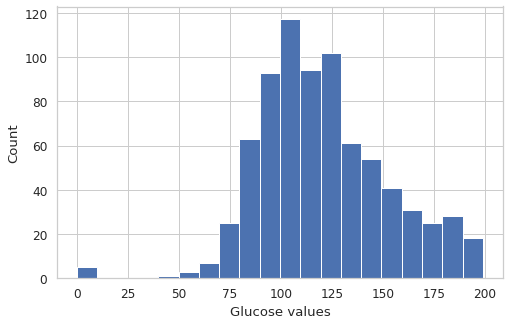

In [14]:
#Bar Graph for data values in Glucose column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    medicalReportData['Glucose'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Glucose values', ylabel='Count');

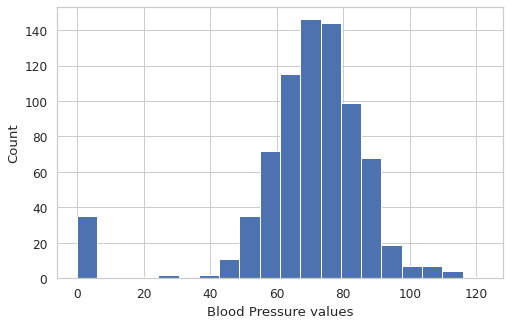

In [15]:
#Bar Graph for data values in Blood Pressure column
sns.distplot(
    medicalReportData['BloodPressure'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Blood Pressure values', ylabel='Count');

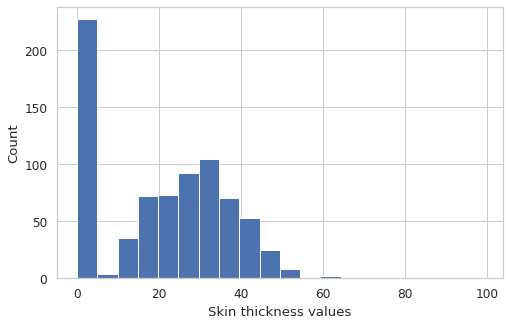

In [16]:
#Bar Graph for data values in Skin Thickness column
sns.distplot(
    medicalReportData['SkinThickness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Skin thickness values', ylabel='Count');

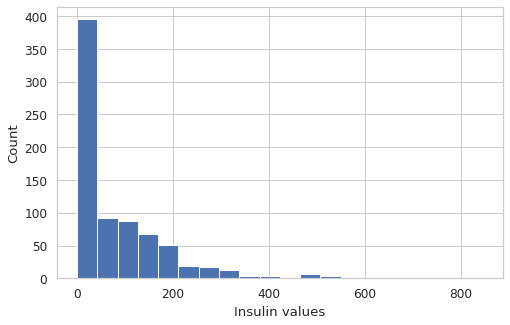

In [17]:
#Bar Graph for data values in Insulin column
sns.distplot(
    medicalReportData['Insulin'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Insulin values', ylabel='Count');

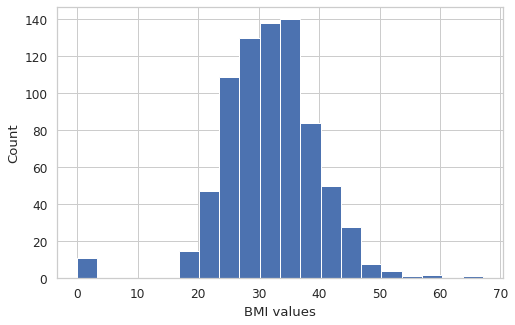

In [18]:
#Bar Graph for data values in BMI column
sns.distplot(
    medicalReportData['BMI'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='BMI values', ylabel='Count');

**This is just a graphical presentation to see the different values and their weightage in each column**
1.	From the **glucose values vs count histrogram graph**, we can see that majority of values in the glucose column is between 80 to 130. 
2.	From the **blood pressure values vs count histrogram graph**, we can see that there are many records with 0 which totally looks like a outlier. The majority of blood pressure values is between 50 to 90
3.	From the **skin thickness values vs count histrogram graph**, we can easily see that the count of 0’s is more than any other values count
4.	From the **insulin values vs count histrogram graph**, we can see that, insulin values majorly under 300, but the count of 0 data values is highest and not ignorable at all
5.	From the **BMI values vs count histrogram graph**, we can see that, the majority of BMI values are between 20 to 50. And also, there are quite notable amount of 0 data values as well.


# Data Cleaning and Data Transformation
Performing imputer operation, using which we will be replacing the 0 values with the column’s median value

**Note**: For data cleaning and transformation, a temporary dataset is created so that no data is lost during any operations

In [0]:
tempData = medicalReportData.iloc[:, :-1]
imputer = SimpleImputer(missing_values=0, strategy='median')
tempData2 = imputer.fit_transform(tempData)
processed_data = pd.DataFrame(tempData2)

In [20]:
labels = {0:'Pregnancies', 1:'Glucose', 2:'BloodPressure', 3:'SkinThickness', 4:'Insulin', 5:'BMI', 6:'DiabetesPedigreeFunction', 7:'Age'}
print(labels)
print("\n")
print("Column Name     Number of null values \n")
print((processed_data[:] == 0).sum())

{0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'}


Column Name     Number of null values 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


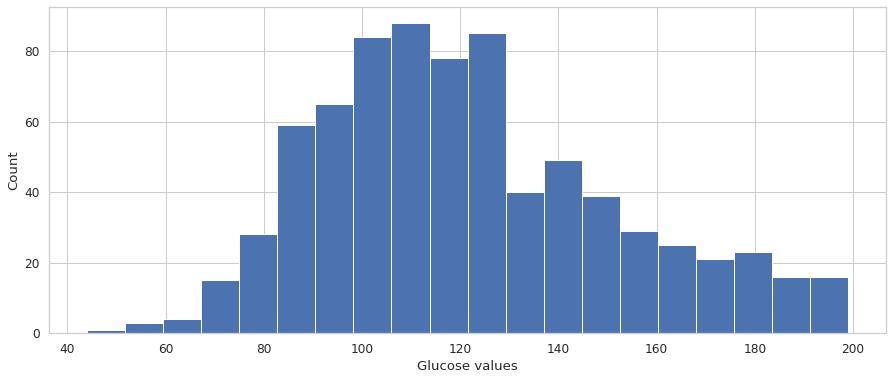

In [21]:
#Bar Graph for data values in Glucose column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 6]})
sns.distplot(
    processed_data[1], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Glucose values', ylabel='Count');

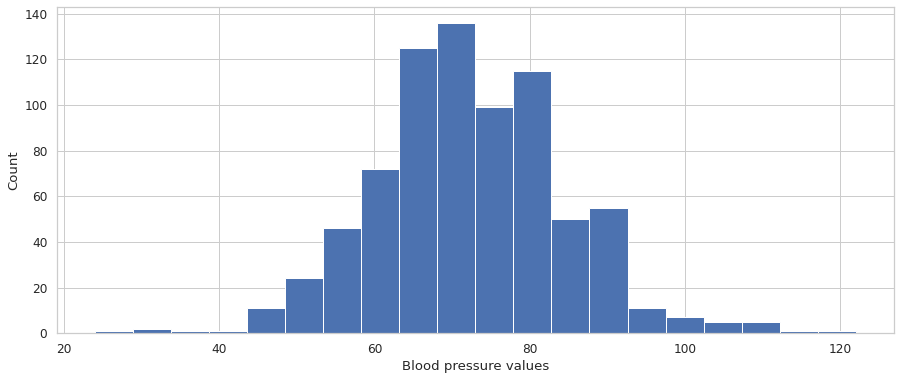

In [22]:
#Bar Graph for data values in Blood pressure column
sns.distplot(
    processed_data[2], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Blood pressure values', ylabel='Count');

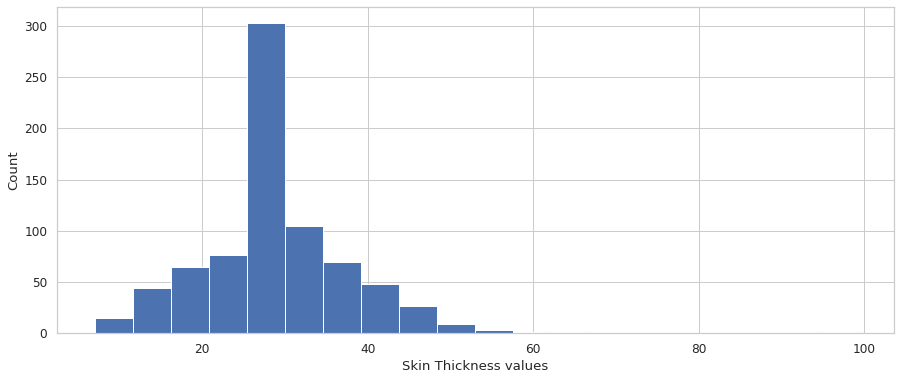

In [23]:
#Bar Graph for data values in Skin Thickness column
sns.distplot(
    processed_data[3], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Skin Thickness values', ylabel='Count');

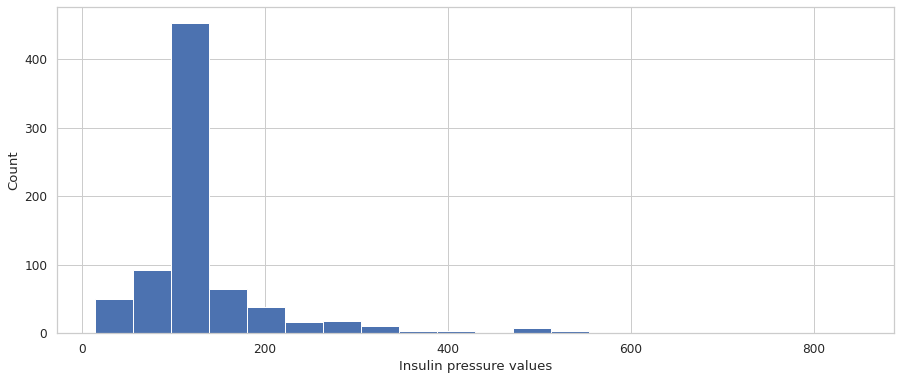

In [24]:
#Bar Graph for data values in Insulin pressure column
sns.distplot(
    processed_data[4], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Insulin pressure values', ylabel='Count');

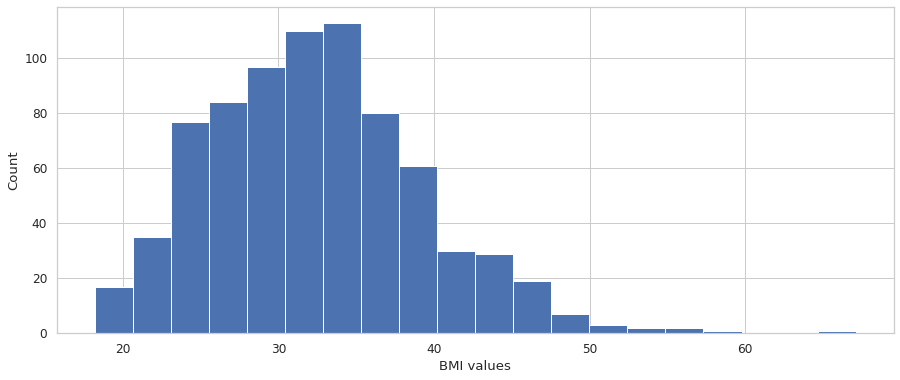

In [25]:
#Bar Graph for data values in BMI column
sns.distplot(
    processed_data[5], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='BMI values', ylabel='Count');

In [0]:
medicalReportData['Glucose'] = processed_data[1]
medicalReportData['BloodPressure'] = processed_data[2]
medicalReportData['SkinThickness'] = processed_data[3]
medicalReportData['Insulin'] = processed_data[4]
medicalReportData['BMI'] = processed_data[5]

In [27]:
medicalReportData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Interpretation
1.	Here, we created a temporary dataset to perform imputer operation, using which we replaced the 0 data values with the column’s median value. Also, while creating the temporary dataset, we ignored the Outcome column.
2.	Checking the count of 0 values, if there are any uisng both the numeric reading method and the graphical representation of the data values of each column
3. Here from the processed columns we are only going to take the concerned columns, which were actually required to have no 0’s as data values. Than we replaced the processed data into our original dataset
2.	Finally, printing the data statistics of min, median, max, standard deviation, etc. of our transformed and final data 
  


# Basic Statistics and co-relation
We will study the transformed data and will understand the co-relation between columns 


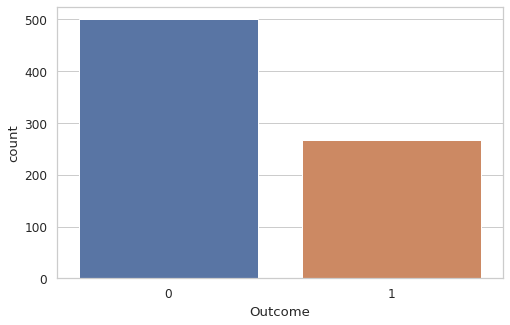

In [28]:
#Bar Graph for Outcome column
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(medicalReportData['Outcome']);

In [29]:
print("Total number of patients:                ", (medicalReportData['Outcome']).count() ) 
print("Total number of diabetic patients:       ", (medicalReportData['Outcome'] == 1).sum() ) 
print("Total number of non diabetic patients:   ", (medicalReportData['Outcome'] == 0).sum() ) 
print("Diabetic patients %:                     ", (medicalReportData['Outcome'] == 1).sum()/768*100 ) 
print("Non diabetic patients %:                 ", (medicalReportData['Outcome'] == 0).sum()/768*100 )

Total number of patients:                 768
Total number of diabetic patients:        268
Total number of non diabetic patients:    500
Diabetic patients %:                      34.89583333333333
Non diabetic patients %:                  65.10416666666666


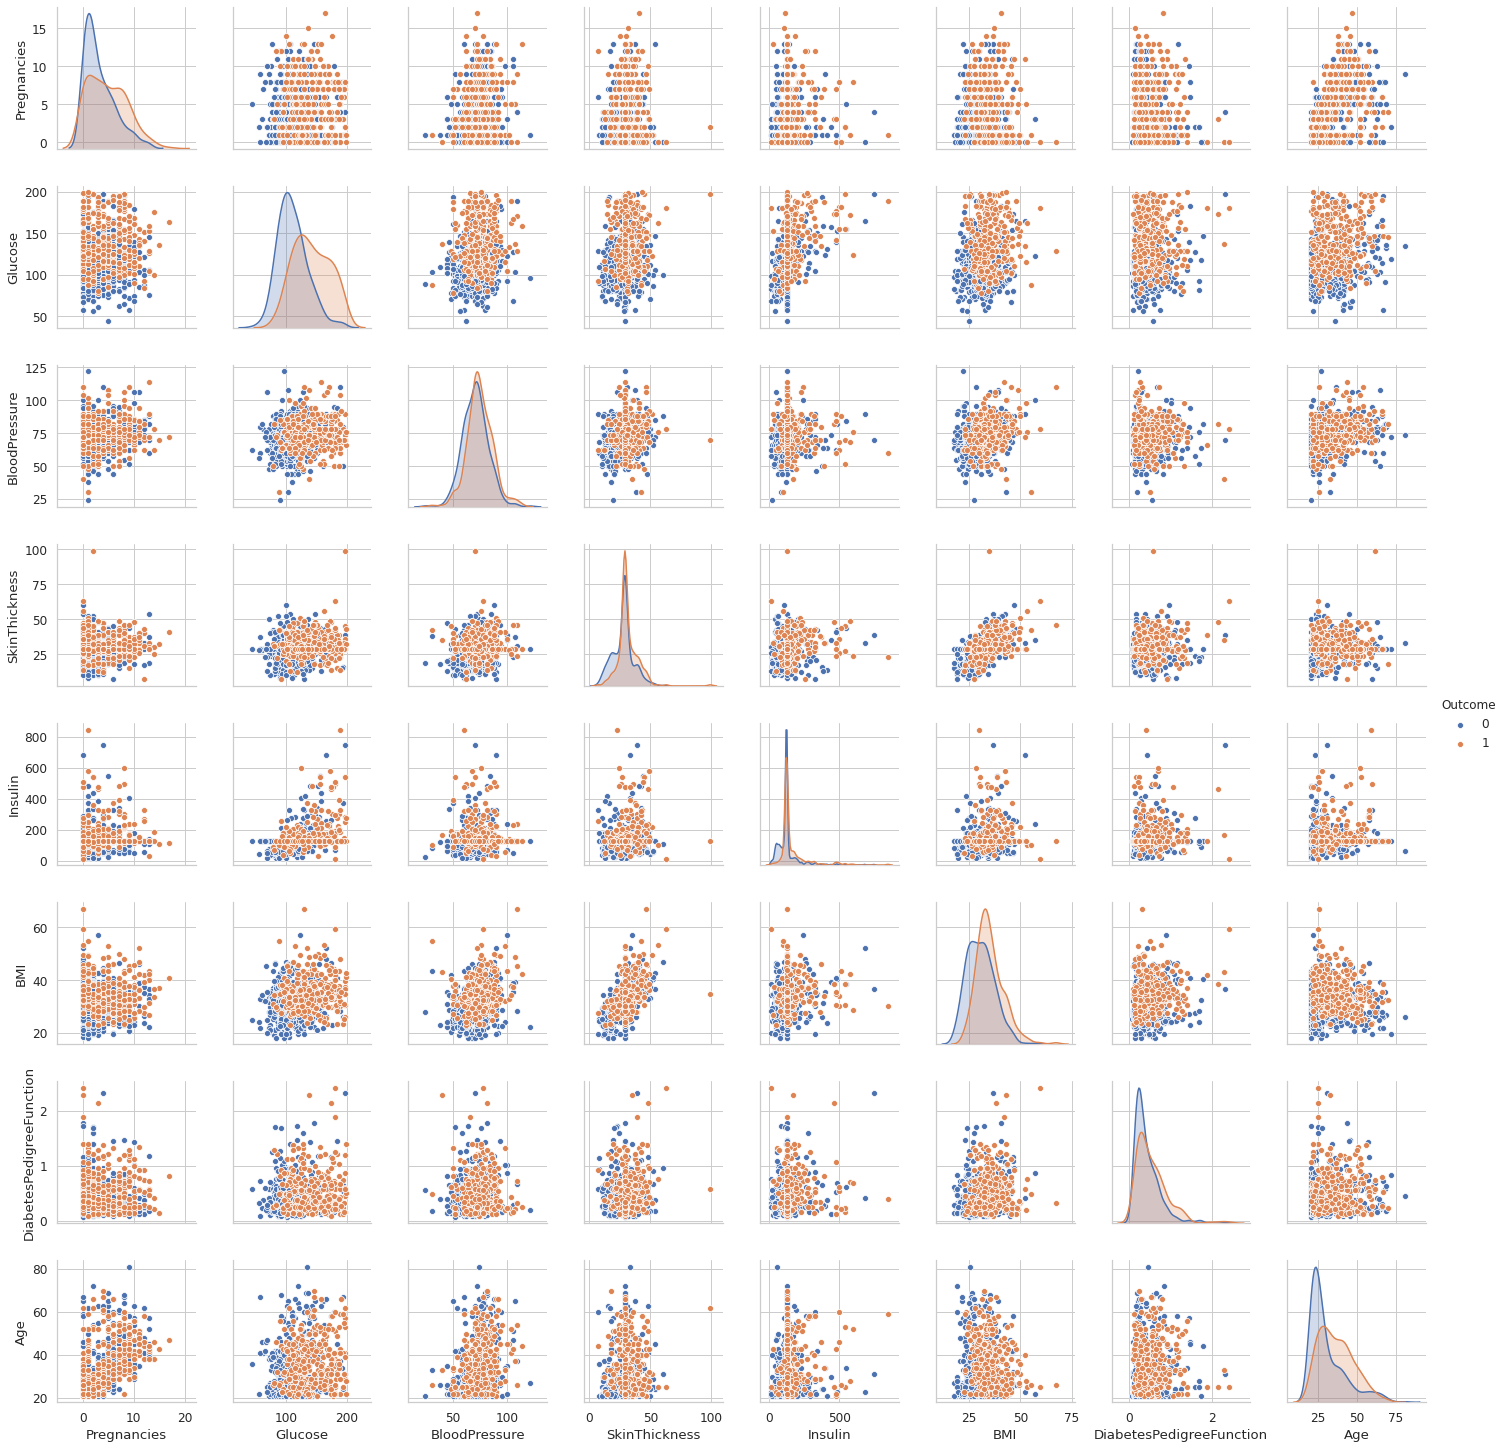

In [30]:
sns.pairplot(medicalReportData, hue='Outcome')

In [31]:
medicalReportData.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


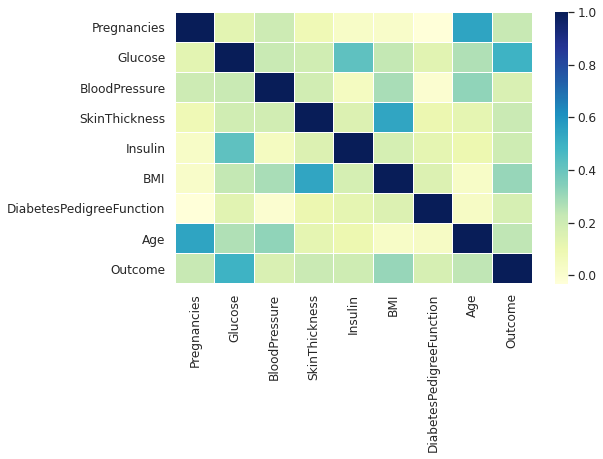

In [32]:
sns.heatmap(medicalReportData.corr(), annot=False, linewidths=.10, cmap="YlGnBu")

##Interpretation
1.	From the histogram created using the countplot() function, we can see that out of total 768 records, **268 are diabetic patients** and **500 are non diabetic patients**
2.	So we state that out of the total population, **34.89% are diabetic** patients and the remaining **65.10% are non-diabetic** patients
3.	Using the pairplot, we are able to generate scatter plots for all columns against each other. Also we are using Outcome column for the hue property, which is why the **orange color in the graphs denote 1(diabetic)** and **blue color denotes 0(non-diabetic)** patients
4.	The correlation values between variables are generated using the corr() function. Also, a heat map displaying the relation between columns is generated using the heatmap() function
5.	With all the scatter plots, only the **measure correlations that are notable** are:
 * BMI and SkinThickness are positively corelated the most then all others 
 * Glucose has the strongest relation with the Outcome(predictor variable) column
 * Also, BMI has strong relation with the Outcome(predictor variable) column
 * The Insulin and SkinThickness measurements are not highly correlated with Outcome, and so we can rule out concern of the data leakage

6.	**Finally, from all the generated output, we can see that Glucose and BMI are the variables that are strongly co-related to the Outcome variable**



# Model Building
Using sklearn, we are splitting the population data into 20% for testing and 80% for training. Also, we will use the median values instead of 0, for only training dataset.


In [0]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X = medicalReportData.iloc[:, :-1]
y = medicalReportData.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

imputer = SimpleImputer(missing_values=0, strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_test2 = imputer.transform(X_test)

## SVM (Support Vector Machine) Model

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear')
model.fit(X_train2, y_train)

predictions = model.predict(X_test2)
print(round(accuracy_score(y_test, predictions)*100,2))

77.27


*Interpretation of SVM Model*

Here, using the train and test datasets, we first fit the model and test with the predictions. The **accuracy score of SVM model is 77.27%**, which can be accepted and is not a bad score for prediction of the Outcome variable 


## SVM (Support Vector Machine) model with rbf(Radial Basic Function)

In [35]:
model = SVC(C=3.0, kernel='rbf', gamma='scale')
model.fit(X_train2, y_train)

prediction = model.predict(X_test2)
print (round(accuracy_score(y_test, prediction)*100,2))

75.97


*Interpretation of SVM with Radial Basic Function*

Here, using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of SVM(RBF) model is 75.97%**, which can be accepted and is not a bad score for prediction of the Outcome variable, but the SVM model is giving us more accuracy 


## KNN (K-Nearest Neighbor) model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train2, y_train)

predict = knn.predict(X_test2)
print (round(accuracy_score(y_test, predict)*100,2))

73.38


*Interpretation of KNN model*

Using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of KNN model is 73.38%**, which can be accepted and is not a bad score for prediction of the Outcome variable, but the SVM is giving more accuracy


## GNB (Gaussian Naïve Bayes) model


In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train2, y_train)

predicted = model.predict(X_test2)
print (round(accuracy_score(y_test, predicted)*100,2))

75.32


*Interpretation of GNB (Gaussian Naive Bayes) model*

Using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of GNB model is 75.32%**, which can be accepted and is not a bad score for prediction of the Outcome variable. But again the accuracy is not than SVM


## Decision Tress Classification model

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12)
model.fit(X_train2, y_train)

predictor = model.predict(X_test2)
print (round(accuracy_score(y_test, predictor)*100,2))

77.92


*Interpretation of Decision Tress Classification model*

Using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of DTC model is 77.92%**, which can be accepted and is not a bad score for prediction of the Outcome variable. Note that DTC is giving more accuracy than all other models.


## Decision tree classification model (criteria of ‘entropy’)

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 12)
model.fit(X_train2, y_train)

pre = model.predict(X_test2)
print (round(accuracy_score(y_test, pre)*100,2))

80.52


In [42]:
print("Confusion Matrix: \n", 
      confusion_matrix(y_test, pre))

print("\n Report : \n", 
    classification_report(y_test, pre))

Confusion Matrix: 
 [[79 20]
 [10 45]]

 Report : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        99
           1       0.69      0.82      0.75        55

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.82      0.81      0.81       154



*Interpretation of the Decision tree classification model (criteria of ‘entropy’)*

Using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of DTC model is 80.52%**, which can be accepted and is the model which is giving the highest accuracy score for prediction of the Outcome variable. 

Finally, we will now print the Confusion matrix and precision, recall f1-score for more details:
1.	From the Confusion matrix (Predicted vs Actual), we conclude that, **our model predicted 79 values as True which are correct** and 20 values which the model predicted to be true are wrong(false). Similarly, **10 values were predicted to be false which are correct** and 45 values which the model predicted to be false was wrong.
2.	**The Precision value tells us that out of all the positive classes we have predicted correctly, 79% are actually positive**
3.	**The Recall value tells us that out of all the positive classes, 81% are correctly predicted**


## XGB classifier


In [43]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train2, y_train)
print('\n Accuracy of XGBClassifier: ', round(xgbc.score(X_test2, y_test)*100,2))


 Accuracy of XGBClassifier:  81.82


In [0]:
columns = X.columns
coefficients = xgbc.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)

In [54]:
print("\n", columns[0], "\t\t\t", round(absCoefficients[0,0]*100,2), '%')
print("\n", columns[1], "\t\t\t", round(absCoefficients[1,0]*100,2), '%')
print("\n", columns[2], "\t\t\t", round(absCoefficients[2,0]*100,2), '%')
print("\n", columns[3], "\t\t\t", round(absCoefficients[3,0]*100,2), '%')
print("\n", columns[4], "\t\t\t", round(absCoefficients[4,0]*100,2), '%')
print("\n", columns[5], "\t\t\t\t", round(absCoefficients[5,0]*100,2), '%')
print("\n", columns[6], "\t", round(absCoefficients[6,0]*100,2), '%')
print("\n", columns[7], "\t\t\t\t", round(absCoefficients[7,0]*100,2), '%')



 Pregnancies 			 11.92 %

 Glucose 			 30.93 %

 BloodPressure 			 5.68 %

 SkinThickness 			 5.55 %

 Insulin 			 9.19 %

 BMI 				 14.4 %

 DiabetesPedigreeFunction 	 9.05 %

 Age 				 13.28 %


*Interpretation of the XGB classifier model*

Here we are using XGB classifier model to predict our Outcome, it uses xgboost. Using the train and test datasets, we first fit the model and test with the predictions. **The accuracy score of DTC model is 81.82%**, which can be accepted and is the model which is giving the highest accuracy score for prediction of the Outcome variable.

Then we printed the Coefficients values (feature importance values) for all the columns. Here, we can see that in the construction of the boosted decision tree, **Glucose feature score is the highest with 30.93%**, thus is the most valuable feature in the prediction of Outcome. Also, **BMI feature share the second highest 14.4% score**. The least valuable feature in the prediction models are BloodPressure and SkinThickness.


# Conclusion

In the end we were able to predict diabetes from medical records with an **accuracy of approximately 82%**. This was done by using **XGBoost model for classification i.e. XGB Classifier** that focus on important features such as **glucose levels** and **BMI(body mass index)**